# ДЗ 3

In [9]:
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения


import itertools
import numpy as np
import pandas as pd 

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data = data.resample('M').mean()

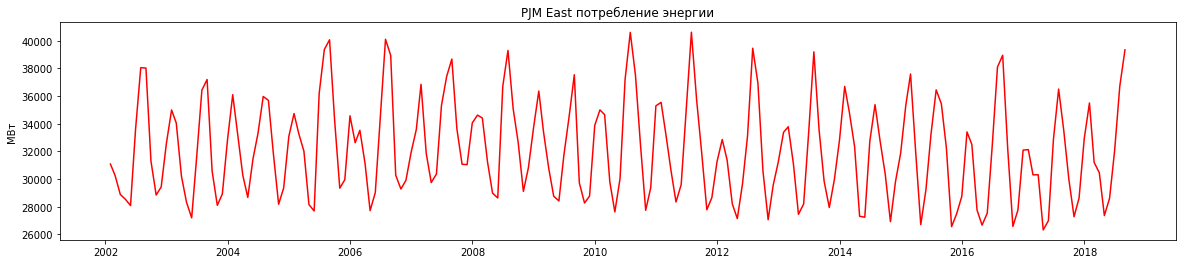

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'].values, '-r')
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

### 2. Подберите параметры модели SARIMAX для этого ряда.

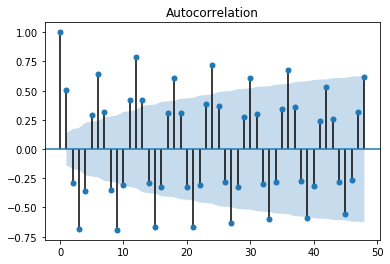

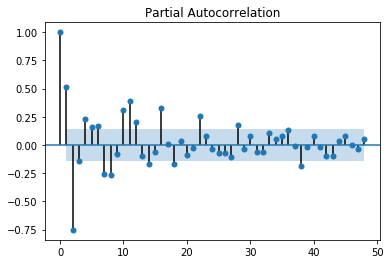

In [4]:
sm.graphics.tsa.plot_acf(data['PJME_MW'].values, lags=48)
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values, lags=48)
plt.show()

In [5]:
TEST_COUNT = 30

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

In [6]:
best_aic = None
best_param = None
best_seasonal = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['PJME_MW'].values[:-TEST_COUNT],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
            results = mod.fit()

            if (not best_aic) or (results.aic < best_aic):
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                best_aic, best_param, best_seasonal = results.aic, param, param_seasonal
        except:
            continue

print(f'BEST AIC = {best_aic}, {best_param}, {best_seasonal}')

ARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:3992.5110075928433
ARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:3744.146929270585
ARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:3579.1077378057253
ARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:3046.3318618560397
ARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:2869.8271231739327
ARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:2724.755996994637
ARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:2696.553764852515
ARIMA(0, 0, 0)x(1, 2, 2, 6) - AIC:2671.8266047669313
ARIMA(0, 0, 1)x(0, 2, 2, 6) - AIC:2647.2101192719
ARIMA(0, 0, 1)x(1, 2, 2, 6) - AIC:2626.424375349513
ARIMA(0, 0, 1)x(2, 2, 2, 6) - AIC:2603.348328653299
ARIMA(0, 1, 1)x(1, 2, 2, 6) - AIC:2589.511138127887
ARIMA(0, 1, 2)x(0, 2, 2, 6) - AIC:2578.4368595789165
ARIMA(0, 1, 2)x(1, 2, 2, 6) - AIC:2567.8223806056653
ARIMA(0, 1, 2)x(2, 2, 2, 6) - AIC:2564.032523031252
ARIMA(1, 1, 2)x(0, 2, 2, 6) - AIC:2560.6183226902335
BEST AIC = 2560.6183226902335, (1, 1, 2), (0, 2, 2, 6)


In [7]:
mod = sm.tsa.statespace.SARIMAX(data['PJME_MW'].values[:-TEST_COUNT],
                                order=best_param,
                                seasonal_order=best_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print('AIC:{}', results.aic)


AIC:{} 2560.6183226902335


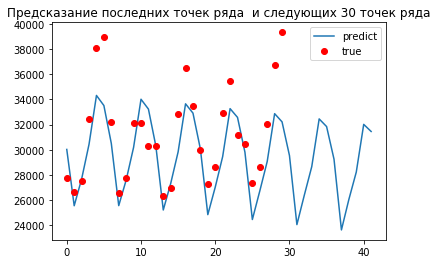

In [8]:
pred_dynamic = results.forecast(42)
plt.plot(pred_dynamic, label='predict' )
plt.plot(data['PJME_MW'].values[-TEST_COUNT:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()
plt.show()

### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Судя по графику предполагаю что предсказание на месячных данных более точно особенно если сравить с недельным вариантом. Здесь также наблюдается что предсказание точек тем слабее, чем дальше от последней известной точки ряда.